In [1]:
import jax
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp


In [2]:
from funciones import get_farfield_radiant_intensity_scalar

Text(0.5, 0, '$x [mm]$')

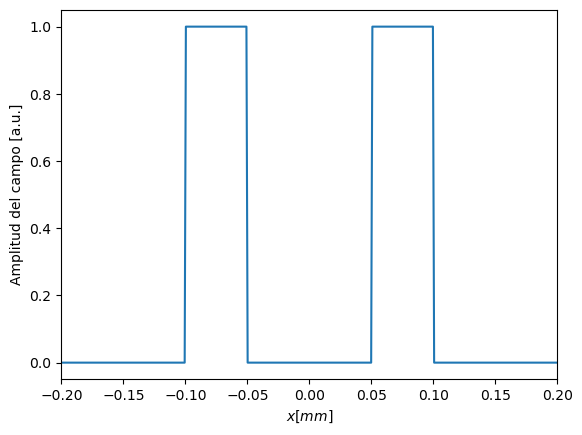

In [3]:
um, nm, mm, cm = 1, 0.001, 1000, 10000

λ = 632.8 * nm # He-Ne laser wavelength 
# define xy plane coordinates and resolution
Nx,Ny = 2048, 2048
extent_x, extent_y =2* mm, 2* mm  # extent of the xy plane
dx,dy = extent_x/Nx, extent_y/Ny # resolution
x,y = dx*(jnp.arange(Nx)-Nx//2), dy*(jnp.arange(Ny)-Ny//2)
xx, yy = jnp.meshgrid(x, y)

def add_rectangular_slit(xx,yy, width, height, x0, y0):
    return jnp.where((((xx >= (x0 - width / 2)) & (xx < (x0 + width / 2)))
                        & ((yy >= (y0 - height / 2)) & (yy < (y0 + height / 2)))),
                        jnp.ones_like(xx), jnp.zeros_like(xx))

D = 0.15*mm       #slits separation
width = 0.05*mm   #slits width
height = 0.23*mm  #slits height

U = (add_rectangular_slit(xx,yy, width, height, x0 =  -D/2, y0 = 0)
    + add_rectangular_slit(xx,yy, width, height, x0 = D/2, y0 = 0)) #input field

plt.plot(x/mm, U[Ny//2,:])
plt.xlim([-0.2,0.2])

plt.ylabel("Amplitud del campo [a.u.]")
plt.xlabel('$x [mm]$')


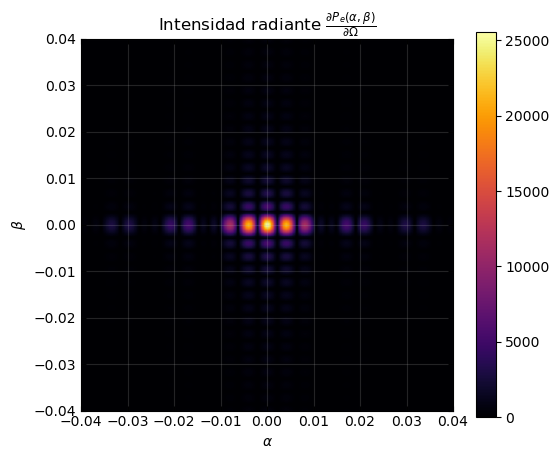

In [4]:
α, β, Lrad = get_farfield_radiant_intensity_scalar(x, y, U,λ)
αα, ββ = jnp.meshgrid(α, β)



fig = plt.figure(figsize=(6, 5))

ax = fig.add_subplot(1,1,1)

im = ax.imshow(np.sqrt(np.abs(Lrad)), origin = 'lower', cmap ='inferno',    extent = [α[0],α[-1],β[0],β[-1]])




ax.set_title(r"Intensidad radiante $\frac{\partial P_e(α,β)}{\partial \Omega} $")
ax.set_ylabel("$β$")
ax.set_xlabel('$α$')
plt.grid(alpha =0.2)
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.set_xlim([-0.04,0.04])
ax.set_ylim([-0.04,0.04])

fig.colorbar(im, orientation = 'vertical')

plt.show()




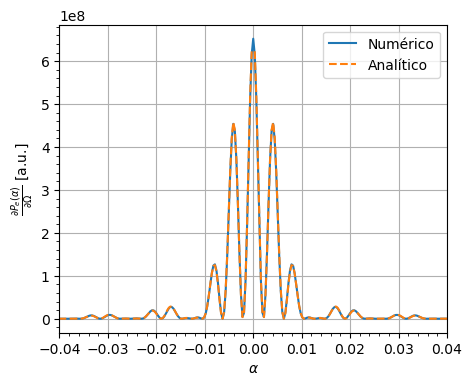

In [6]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)  

ax.plot(α, Lrad[Ny//2,:], '-',label ='Numérico')

I_analytical =  0.5*(width*height/λ)**2 * 4* (1  *   np.sin(np.pi * width * αα /λ)/(np.pi * width * αα /λ))**2 * (np.cos(np.pi * D * αα /λ)**2)
ax.plot(αα[Ny//2,:], I_analytical[Ny//2,:], '--',label ='Analítico')

n = np.array([-2,-1,0,1,2])
#ax.plot(n*λ/width, n*0, 'o', lw=2)
ax.set_ylabel(r"$\frac{\partial P_e(α)}{\partial \Omega} $ [a.u.]")


ax.set_xlabel('$α$')
ax.grid(True)
ax.minorticks_on()
ax.set_xlim([-0.04,0.04])

plt.legend()


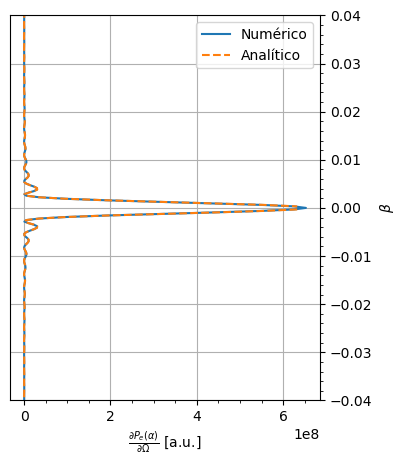

In [8]:

import numpy
from matplotlib import pyplot, transforms





fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(1,1,1)  
ax.set_ylabel('$β$')
ax.grid(True)
ax.minorticks_on()



base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)


ax.plot(β, Lrad[:,Nx//2], '-',label ='Numérico', transform= rot + base)

I_analytical =  0.5*(width*height/λ)**2 * 4* (np.sin(np.pi * height * ββ /λ)/(np.pi * height * (ββ) /λ)  *  1)**2 * (np.cos(np.pi * D * αα /λ)**2)
ax.plot(ββ[:,Nx//2], I_analytical[:,Nx//2], '--',label ='Analítico', transform= rot + base)

n = np.array([-2,-1,0,1,2])
ax.set_xlabel(r"$\frac{\partial P_e(α)}{\partial \Omega} $ [a.u.]")

ax.set_ylim([-0.04,0.04])
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")


plt.legend()

